## Credit Card Fraud detection

### Project Overview
The project objective is to analyze transaction data to develop insights and patterns that improve the accuracy of detecting fraudulent credit card transactions, enhancing security measures for online transactions and minimizing financial losses for cardholders and financial institutions. This project aims to develop a robust system using Python on Google Colab, leveraging essential modules like pandas, matplotlib, seaborn, and scikit-learn (sklearn). Google Colab provides a convenient Integrated Development Environment (IDE) for collaborative coding, facilitating seamless integration and execution of Python scripts. The project primarily utilizes pandas for managing and analyzing data, focusing on its versatile data structures: Series and DataFrame. Additionally, matplotlib and seaborn are employed for visualizing data insights, while scikit-learn supports the implementation of machine learning algorithms for fraud detection. This video sets the stage by outlining the project's objectives, tools, and key Python modules essential for effective data handling, visualization, and machine learning model development.


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/rahulinchal/CSV-Files-/refs/heads/main/credit_card_transactions.csv")
df.head()

,Transaction_ID,Card_Type,Merchant_Category,Transaction_Amount,Transaction_DateTime,City,Country,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent
0,W963UK57,Mastercard,Utility bill,2721.4,01-01-2020 09:43,Tokyo,Japan,23.0,Female,9463.0,3636.965,10000.0,Unknown,Wednesday,No
1,V606KV56,UnionPay,Retail,8395.6,03-01-2020 16:26,Tokyo,Japan,49.0,Male,14812.0,8917.912,15000.0,Desktop,Friday,No
2,R531NU70,Visa,Transportation,19328.0,04-01-2020 03:40,London,UK,NaN,Male,21092.0,10666.860,20000.0,Desktop,Saturday,No
3,T783GF79,American Express,Online Shopping,16738.1,04-01-2020 14:56,Tokyo,Japan,52.0,Female,14807.0,17315.552,20000.0,Desktop,Saturday,Yes
4,K256ZN73,American Express,Retail,8117.0,04-01-2020 17:26,Chicago,USA,37.0,Female,17447.0,5271.309,20000.0,Mobile,Saturday,No


In [3]:
df.shape

(5000, 15)

---
## **df.info()**
The `df.info()` function in pandas is used to provide a concise summary of a DataFrame. It includes information about:

1. The class type (`DataFrame`).
2. The number of entries (rows) in the DataFrame.
3. The range of the index.
4. Column names, their data types, and the count of non-null values in each column.
5. The memory usage of the DataFrame.


### Key Points:
- `Non-Null Count`: Indicates the number of non-missing values in each column.
- `Dtype`: Displays the data type of each column.
- Memory usage is an estimate of the DataFrame's memory footprint. Use `df.info(memory_usage='deep')` for a more accurate estimate.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Transaction_ID             5000 non-null   object 
 1   Card_Type                  4983 non-null   object 
 2   Merchant_Category          4978 non-null   object 
 3   Transaction_Amount         4994 non-null   float64
 4   Transaction_DateTime       5000 non-null   object 
 5   City                       5000 non-null   object 
 6   Country                    5000 non-null   object 
 7   Cardholder_Age             4865 non-null   float64
 8   Cardholder_Gender          4911 non-null   object 
 9   Cardholder_Monthly_Income  4686 non-null   float64
 10  Cardholder_Average_Spend   4792 non-null   float64
 11  Credit_Limit               4991 non-null   float64
 12  Device_Type                4960 non-null   object 
 13  Day_of_Week                5000 non-null   objec

---
## **df.isnull().sum()**
The `df.isnull().sum()` function in pandas is used to count the number of missing (null) values in each column of a DataFrame. It provides a quick way to identify columns with missing data.

### Key Points:
1. **How It Works**:
   - `df.isnull()`: Creates a DataFrame of the same shape as `df` with `True` for missing values and `False` for non-missing values.
   - `.sum()`: Sums up the `True` values (treated as 1) for each column.

2. **Result**: The output is a Series where:
   - The index corresponds to the column names.
   - The values are the count of `NaN` values in each column.

3. **Use Case**: Quickly identify columns with missing data and their extent, which is often the first step in handling missing values (e.g., by imputing or dropping).



In [5]:
df.isnull().sum()

Transaction_ID                 0
Card_Type                     17
Merchant_Category             22
Transaction_Amount             6
Transaction_DateTime           0
City                           0
Country                        0
Cardholder_Age               135
Cardholder_Gender             89
Cardholder_Monthly_Income    314
Cardholder_Average_Spend     208
Credit_Limit                   9
Device_Type                   40
Day_of_Week                    0
Is_Fraudulent                  0
dtype: int64

In [6]:
null_values = df.columns[df.isnull().sum() > 0]
null_values

Index(['Card_Type', 'Merchant_Category', 'Transaction_Amount',
       'Cardholder_Age', 'Cardholder_Gender', 'Cardholder_Monthly_Income',
       'Cardholder_Average_Spend', 'Credit_Limit', 'Device_Type'],
      dtype='object')

In [7]:
for i in null_values:
    print(f"Unique values in '{i}':")
    print(df[i].unique())
    print("-" * 40)

Unique values in 'Card_Type':
['Mastercard' 'UnionPay' 'Visa' 'American Express' nan]
----------------------------------------
Unique values in 'Merchant_Category':
['Utility bill' 'Retail' 'Transportation' 'Online Shopping'
 'Entertainment' 'Education' 'Dining' 'Healthcare' nan]
----------------------------------------
Unique values in 'Transaction_Amount':
[ 2721.4  8395.6 19328.  ...  3378.8  3867.9  3467.2]
----------------------------------------
Unique values in 'Cardholder_Age':
[23. 49. nan 52. 37. 80. 33. 46. 44. 77. 60. 79. 40. 61. 73. 34. 70. 18.
 45. 39. 69. 47. 28. 30. 65. 31. 55. 62. 48. 26. 66. 57. 76. 20. 54. 35.
 75. 53. 21. 27. 56. 19. 71. 29. 32. 63. 72. 41. 38. 64. 25. 58. 74. 78.
 50. 68. 24. 36. 43. 22. 59. 42. 51. 67.]
----------------------------------------
Unique values in 'Cardholder_Gender':
['Female' 'Male' nan]
----------------------------------------
Unique values in 'Cardholder_Monthly_Income':
[ 9463. 14812. 21092. ... 12879.  6302.  6695.]
------------

In [8]:
df.dtypes

Transaction_ID                object
Card_Type                     object
Merchant_Category             object
Transaction_Amount           float64
Transaction_DateTime          object
City                          object
Country                       object
Cardholder_Age               float64
Cardholder_Gender             object
Cardholder_Monthly_Income    float64
Cardholder_Average_Spend     float64
Credit_Limit                 float64
Device_Type                   object
Day_of_Week                   object
Is_Fraudulent                 object
dtype: object

In [9]:
object_dtype = df.select_dtypes(include = ['object']).columns
object_dtype

Index(['Transaction_ID', 'Card_Type', 'Merchant_Category',
       'Transaction_DateTime', 'City', 'Country', 'Cardholder_Gender',
       'Device_Type', 'Day_of_Week', 'Is_Fraudulent'],
      dtype='object')

In [10]:
for i in object_dtype:
    print(i)
    print(df[i].unique())
    print("--")

Transaction_ID
['W963UK57' 'V606KV56' 'R531NU70' ... 'S458OS59' 'E863PD98' 'D501WH15']
--
Card_Type
['Mastercard' 'UnionPay' 'Visa' 'American Express' nan]
--
Merchant_Category
['Utility bill' 'Retail' 'Transportation' 'Online Shopping'
 'Entertainment' 'Education' 'Dining' 'Healthcare' nan]
--
Transaction_DateTime
['01-01-2020 09:43' '03-01-2020 16:26' '04-01-2020 03:40' ...
 '30-12-2023 07:06' '30-12-2023 07:50' '30-12-2023 11:41']
--
City
['Tokyo' 'London' 'Chicago' 'Sydney' 'Hong Kong' 'Paris' 'Shanghai'
 'New York' 'Dubai' 'Los Angeles' 'Berlin' 'Toronto' 'Mumbai']
--
Country
['Japan' 'UK' 'USA' 'Australia' 'China' 'France' 'UAE' 'Germany' 'Canada'
 'India']
--
Cardholder_Gender
['Female' 'Male' nan]
--
Device_Type
['Unknown' 'Desktop' 'Mobile' 'Point-of-Sale Terminal'
 'Contactless Payment Device' nan]
--
Day_of_Week
['Wednesday' 'Friday' 'Saturday' 'Sunday' 'Tuesday' 'Thursday' 'Monday']
--
Is_Fraudulent
['No' 'Yes']
--


In [11]:
df.head()

,Transaction_ID,Card_Type,Merchant_Category,Transaction_Amount,Transaction_DateTime,City,Country,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent
0,W963UK57,Mastercard,Utility bill,2721.4,01-01-2020 09:43,Tokyo,Japan,23.0,Female,9463.0,3636.965,10000.0,Unknown,Wednesday,No
1,V606KV56,UnionPay,Retail,8395.6,03-01-2020 16:26,Tokyo,Japan,49.0,Male,14812.0,8917.912,15000.0,Desktop,Friday,No
2,R531NU70,Visa,Transportation,19328.0,04-01-2020 03:40,London,UK,NaN,Male,21092.0,10666.860,20000.0,Desktop,Saturday,No
3,T783GF79,American Express,Online Shopping,16738.1,04-01-2020 14:56,Tokyo,Japan,52.0,Female,14807.0,17315.552,20000.0,Desktop,Saturday,Yes
4,K256ZN73,American Express,Retail,8117.0,04-01-2020 17:26,Chicago,USA,37.0,Female,17447.0,5271.309,20000.0,Mobile,Saturday,No


In [12]:
df.duplicated().sum()

0

---
## **df.describe()**
The `df.describe().T` function in pandas is used to generate descriptive statistics for numerical columns in a DataFrame and then transpose the result for better readability. Here's what it does:

1. **`df.describe()`**: Provides summary statistics for numerical columns, including:
   - **count**: Number of non-null values.
   - **mean**: Average value.
   - **std**: Standard deviation.
   - **min**: Minimum value.
   - **25%**: First quartile (25th percentile).
   - **50%**: Median (50th percentile).
   - **75%**: Third quartile (75th percentile).
   - **max**: Maximum value.

2. **`.T`**: Transposes the result so that rows become columns and vice versa, making it easier to read when there are many numerical columns.

### Use Case:
The transposed format is especially useful when working with DataFrames that have many numerical columns, as it allows for easier vertical comparison of statistics for each column.

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction_Amount,4994.0,7466.799600,4308.904562,2500.800,3974.25000,6092.2000,9837.35000,19992.300
Cardholder_Age,4865.0,49.106680,18.398524,18.000,33.00000,49.0000,65.00000,80.000
Cardholder_Monthly_Income,4686.0,13735.441315,6947.159793,3501.000,7348.50000,13183.5000,18905.25000,29991.000
Cardholder_Average_Spend,4792.0,6305.834357,4005.698970,1028.241,3333.67425,4954.7945,8373.23525,19989.829
Credit_Limit,4991.0,12465.437788,5566.824649,5000.000,10000.00000,10000.0000,15000.00000,20000.000


In [14]:
df.head()

,Transaction_ID,Card_Type,Merchant_Category,Transaction_Amount,Transaction_DateTime,City,Country,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent
0,W963UK57,Mastercard,Utility bill,2721.4,01-01-2020 09:43,Tokyo,Japan,23.0,Female,9463.0,3636.965,10000.0,Unknown,Wednesday,No
1,V606KV56,UnionPay,Retail,8395.6,03-01-2020 16:26,Tokyo,Japan,49.0,Male,14812.0,8917.912,15000.0,Desktop,Friday,No
2,R531NU70,Visa,Transportation,19328.0,04-01-2020 03:40,London,UK,NaN,Male,21092.0,10666.860,20000.0,Desktop,Saturday,No
3,T783GF79,American Express,Online Shopping,16738.1,04-01-2020 14:56,Tokyo,Japan,52.0,Female,14807.0,17315.552,20000.0,Desktop,Saturday,Yes
4,K256ZN73,American Express,Retail,8117.0,04-01-2020 17:26,Chicago,USA,37.0,Female,17447.0,5271.309,20000.0,Mobile,Saturday,No


In [15]:
df.isnull().sum()

Transaction_ID                 0
Card_Type                     17
Merchant_Category             22
Transaction_Amount             6
Transaction_DateTime           0
City                           0
Country                        0
Cardholder_Age               135
Cardholder_Gender             89
Cardholder_Monthly_Income    314
Cardholder_Average_Spend     208
Credit_Limit                   9
Device_Type                   40
Day_of_Week                    0
Is_Fraudulent                  0
dtype: int64

In [16]:
df = df.dropna()
df.isnull().sum()

Transaction_ID               0
Card_Type                    0
Merchant_Category            0
Transaction_Amount           0
Transaction_DateTime         0
City                         0
Country                      0
Cardholder_Age               0
Cardholder_Gender            0
Cardholder_Monthly_Income    0
Cardholder_Average_Spend     0
Credit_Limit                 0
Device_Type                  0
Day_of_Week                  0
Is_Fraudulent                0
dtype: int64

In [17]:
df.shape

(4220, 15)

In [18]:
object_dtype

Index(['Transaction_ID', 'Card_Type', 'Merchant_Category',
       'Transaction_DateTime', 'City', 'Country', 'Cardholder_Gender',
       'Device_Type', 'Day_of_Week', 'Is_Fraudulent'],
      dtype='object')

In [19]:
df.head()

,Transaction_ID,Card_Type,Merchant_Category,Transaction_Amount,Transaction_DateTime,City,Country,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent
0,W963UK57,Mastercard,Utility bill,2721.4,01-01-2020 09:43,Tokyo,Japan,23.0,Female,9463.0,3636.965,10000.0,Unknown,Wednesday,No
1,V606KV56,UnionPay,Retail,8395.6,03-01-2020 16:26,Tokyo,Japan,49.0,Male,14812.0,8917.912,15000.0,Desktop,Friday,No
3,T783GF79,American Express,Online Shopping,16738.1,04-01-2020 14:56,Tokyo,Japan,52.0,Female,14807.0,17315.552,20000.0,Desktop,Saturday,Yes
4,K256ZN73,American Express,Retail,8117.0,04-01-2020 17:26,Chicago,USA,37.0,Female,17447.0,5271.309,20000.0,Mobile,Saturday,No
5,I812SG19,American Express,Entertainment,13191.8,04-01-2020 19:55,Tokyo,Japan,80.0,Male,16667.0,8039.344,15000.0,Point-of-Sale Terminal,Saturday,No


In [20]:
df = df.drop('Transaction_ID', axis = 1)
df.head()

,Card_Type,Merchant_Category,Transaction_Amount,Transaction_DateTime,City,Country,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent
0,Mastercard,Utility bill,2721.4,01-01-2020 09:43,Tokyo,Japan,23.0,Female,9463.0,3636.965,10000.0,Unknown,Wednesday,No
1,UnionPay,Retail,8395.6,03-01-2020 16:26,Tokyo,Japan,49.0,Male,14812.0,8917.912,15000.0,Desktop,Friday,No
3,American Express,Online Shopping,16738.1,04-01-2020 14:56,Tokyo,Japan,52.0,Female,14807.0,17315.552,20000.0,Desktop,Saturday,Yes
4,American Express,Retail,8117.0,04-01-2020 17:26,Chicago,USA,37.0,Female,17447.0,5271.309,20000.0,Mobile,Saturday,No
5,American Express,Entertainment,13191.8,04-01-2020 19:55,Tokyo,Japan,80.0,Male,16667.0,8039.344,15000.0,Point-of-Sale Terminal,Saturday,No


### Float Dtype

In [21]:
float_dtype = df.select_dtypes(include = ['float']).columns
float_dtype

Index(['Transaction_Amount', 'Cardholder_Age', 'Cardholder_Monthly_Income',
       'Cardholder_Average_Spend', 'Credit_Limit'],
      dtype='object')

### Outlier detection

<Axes: xlabel='Transaction_Amount'>

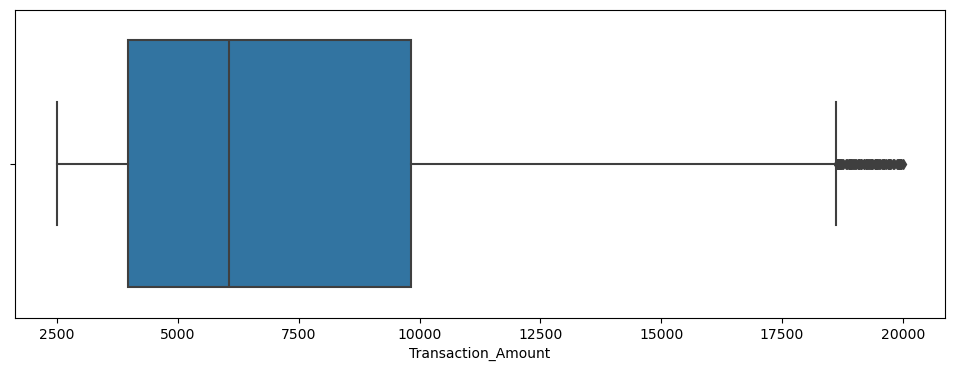

In [22]:
plt.figure(figsize = (12,4))
sns.boxplot(x = df['Transaction_Amount'])

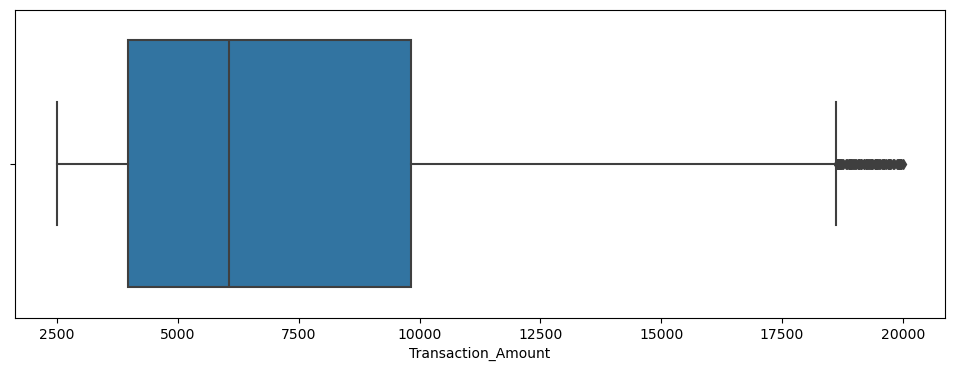

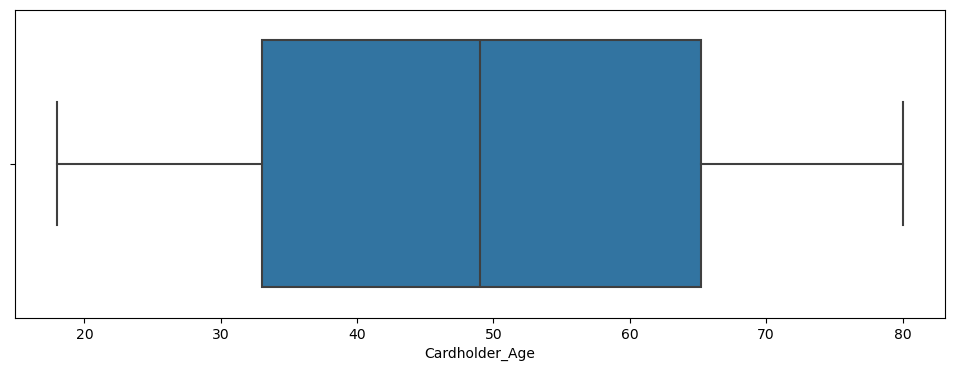

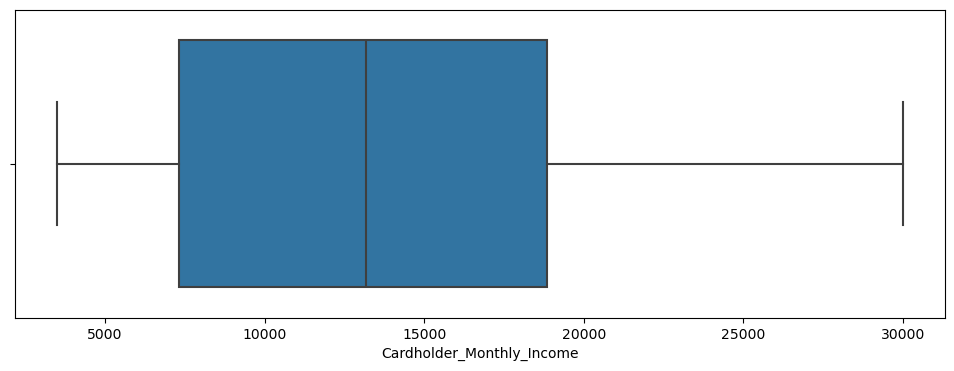

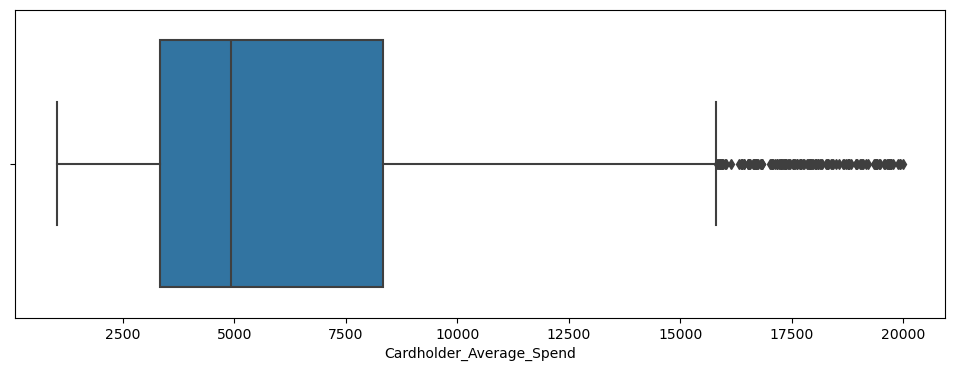

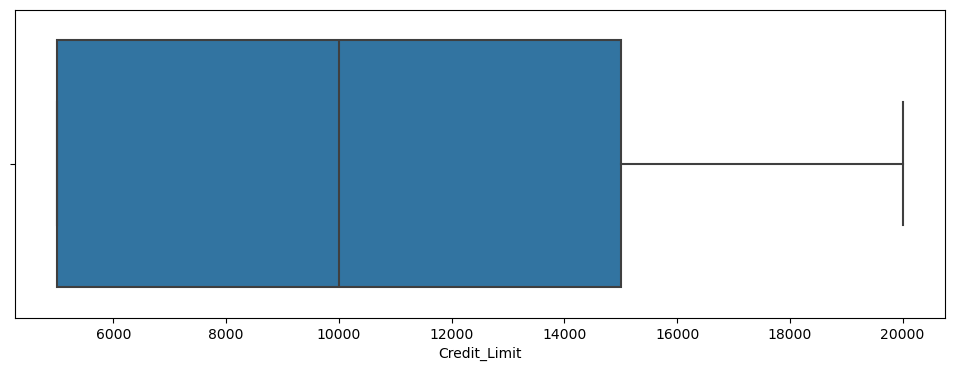

In [23]:
for i in float_dtype:
    plt.figure(figsize = (12,4))
    sns.boxplot(x = df[i])
    plt.show()

In [24]:
df.head()

,Card_Type,Merchant_Category,Transaction_Amount,Transaction_DateTime,City,Country,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent
0,Mastercard,Utility bill,2721.4,01-01-2020 09:43,Tokyo,Japan,23.0,Female,9463.0,3636.965,10000.0,Unknown,Wednesday,No
1,UnionPay,Retail,8395.6,03-01-2020 16:26,Tokyo,Japan,49.0,Male,14812.0,8917.912,15000.0,Desktop,Friday,No
3,American Express,Online Shopping,16738.1,04-01-2020 14:56,Tokyo,Japan,52.0,Female,14807.0,17315.552,20000.0,Desktop,Saturday,Yes
4,American Express,Retail,8117.0,04-01-2020 17:26,Chicago,USA,37.0,Female,17447.0,5271.309,20000.0,Mobile,Saturday,No
5,American Express,Entertainment,13191.8,04-01-2020 19:55,Tokyo,Japan,80.0,Male,16667.0,8039.344,15000.0,Point-of-Sale Terminal,Saturday,No


In [25]:
df['Transaction_DateTime']

0       01-01-2020 09:43
1       03-01-2020 16:26
3       04-01-2020 14:56
4       04-01-2020 17:26
5       04-01-2020 19:55
              ...       
4993    28-12-2023 19:28
4994    28-12-2023 19:32
4995    29-12-2023 09:22
4997    30-12-2023 07:06
4998    30-12-2023 07:50
Name: Transaction_DateTime, Length: 4220, dtype: object

In [26]:
df['Transaction_DateTime'] = pd.to_datetime(df['Transaction_DateTime'],format='%d-%m-%Y %H:%M')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4220 entries, 0 to 4998
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Card_Type                  4220 non-null   object        
 1   Merchant_Category          4220 non-null   object        
 2   Transaction_Amount         4220 non-null   float64       
 3   Transaction_DateTime       4220 non-null   datetime64[ns]
 4   City                       4220 non-null   object        
 5   Country                    4220 non-null   object        
 6   Cardholder_Age             4220 non-null   float64       
 7   Cardholder_Gender          4220 non-null   object        
 8   Cardholder_Monthly_Income  4220 non-null   float64       
 9   Cardholder_Average_Spend   4220 non-null   float64       
 10  Credit_Limit               4220 non-null   float64       
 11  Device_Type                4220 non-null   object        
 12  Day_of_Week

In [27]:
# Extract day, month, year, and time into new columns
df['Day'] = df['Transaction_DateTime'].dt.day
df['Month'] = df['Transaction_DateTime'].dt.month
df['Year'] = df['Transaction_DateTime'].dt.year
df['Time'] = df['Transaction_DateTime'].dt.time

In [28]:
df.head()

,Card_Type,Merchant_Category,Transaction_Amount,Transaction_DateTime,City,Country,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent,Day,Month,Year,Time
0,Mastercard,Utility bill,2721.4,2020-01-01 09:43:00,Tokyo,Japan,23.0,Female,9463.0,3636.965,10000.0,Unknown,Wednesday,No,1,1,2020,09:43:00
1,UnionPay,Retail,8395.6,2020-01-03 16:26:00,Tokyo,Japan,49.0,Male,14812.0,8917.912,15000.0,Desktop,Friday,No,3,1,2020,16:26:00
3,American Express,Online Shopping,16738.1,2020-01-04 14:56:00,Tokyo,Japan,52.0,Female,14807.0,17315.552,20000.0,Desktop,Saturday,Yes,4,1,2020,14:56:00
4,American Express,Retail,8117.0,2020-01-04 17:26:00,Chicago,USA,37.0,Female,17447.0,5271.309,20000.0,Mobile,Saturday,No,4,1,2020,17:26:00
5,American Express,Entertainment,13191.8,2020-01-04 19:55:00,Tokyo,Japan,80.0,Male,16667.0,8039.344,15000.0,Point-of-Sale Terminal,Saturday,No,4,1,2020,19:55:00


In [29]:
df = df.drop('Transaction_DateTime', axis =1)

In [30]:
df.head()

,Card_Type,Merchant_Category,Transaction_Amount,City,Country,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent,Day,Month,Year,Time
0,Mastercard,Utility bill,2721.4,Tokyo,Japan,23.0,Female,9463.0,3636.965,10000.0,Unknown,Wednesday,No,1,1,2020,09:43:00
1,UnionPay,Retail,8395.6,Tokyo,Japan,49.0,Male,14812.0,8917.912,15000.0,Desktop,Friday,No,3,1,2020,16:26:00
3,American Express,Online Shopping,16738.1,Tokyo,Japan,52.0,Female,14807.0,17315.552,20000.0,Desktop,Saturday,Yes,4,1,2020,14:56:00
4,American Express,Retail,8117.0,Chicago,USA,37.0,Female,17447.0,5271.309,20000.0,Mobile,Saturday,No,4,1,2020,17:26:00
5,American Express,Entertainment,13191.8,Tokyo,Japan,80.0,Male,16667.0,8039.344,15000.0,Point-of-Sale Terminal,Saturday,No,4,1,2020,19:55:00


In [31]:
df['Device_Type'].unique()

array(['Unknown', 'Desktop', 'Mobile', 'Point-of-Sale Terminal',
       'Contactless Payment Device'], dtype=object)

In [32]:
df[df['Device_Type'] == 'Unknown']

,Card_Type,Merchant_Category,Transaction_Amount,City,Country,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent,Day,Month,Year,Time
0,Mastercard,Utility bill,2721.4,Tokyo,Japan,23.0,Female,9463.0,3636.965,10000.0,Unknown,Wednesday,No,1,1,2020,09:43:00
8,Mastercard,Entertainment,4452.8,Sydney,Australia,44.0,Male,9385.0,2965.372,10000.0,Unknown,Sunday,No,5,1,2020,19:55:00
31,UnionPay,Retail,4045.8,Dubai,UAE,60.0,Male,16999.0,5281.001,20000.0,Unknown,Wednesday,No,15,1,2020,03:33:00
32,Mastercard,Education,3135.2,Dubai,UAE,37.0,Male,13694.0,1368.110,10000.0,Unknown,Wednesday,Yes,15,1,2020,13:42:00
33,Visa,Online Shopping,4434.7,Paris,France,40.0,Female,8421.0,5180.338,10000.0,Unknown,Wednesday,No,15,1,2020,16:15:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4973,Visa,Education,8001.5,New York,USA,56.0,Male,11854.0,6057.591,10000.0,Unknown,Thursday,Yes,21,12,2023,22:56:00
4976,UnionPay,Retail,9503.0,New York,USA,73.0,Female,14207.0,6129.517,10000.0,Unknown,Saturday,Yes,23,12,2023,03:10:00
4977,Mastercard,Transportation,5366.9,Paris,France,18.0,Male,7228.0,5004.595,10000.0,Unknown,Saturday,No,23,12,2023,07:39:00
4991,Mastercard,Utility bill,9303.4,Paris,France,39.0,Female,14126.0,4445.027,10000.0,Unknown,Thursday,No,28,12,2023,15:38:00


In [33]:
df.head()

,Card_Type,Merchant_Category,Transaction_Amount,City,Country,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent,Day,Month,Year,Time
0,Mastercard,Utility bill,2721.4,Tokyo,Japan,23.0,Female,9463.0,3636.965,10000.0,Unknown,Wednesday,No,1,1,2020,09:43:00
1,UnionPay,Retail,8395.6,Tokyo,Japan,49.0,Male,14812.0,8917.912,15000.0,Desktop,Friday,No,3,1,2020,16:26:00
3,American Express,Online Shopping,16738.1,Tokyo,Japan,52.0,Female,14807.0,17315.552,20000.0,Desktop,Saturday,Yes,4,1,2020,14:56:00
4,American Express,Retail,8117.0,Chicago,USA,37.0,Female,17447.0,5271.309,20000.0,Mobile,Saturday,No,4,1,2020,17:26:00
5,American Express,Entertainment,13191.8,Tokyo,Japan,80.0,Male,16667.0,8039.344,15000.0,Point-of-Sale Terminal,Saturday,No,4,1,2020,19:55:00


## Univariate analysis

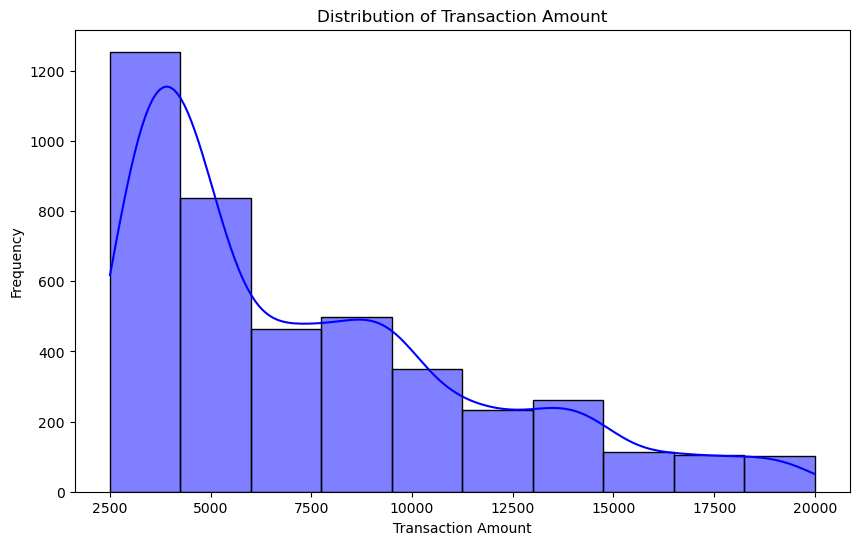

In [34]:
# 1. Distribution of Transaction Amount
plt.figure(figsize=(10, 6))
sns.histplot(df['Transaction_Amount'], kde=True, bins=10, color='blue')
plt.title('Distribution of Transaction Amount')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

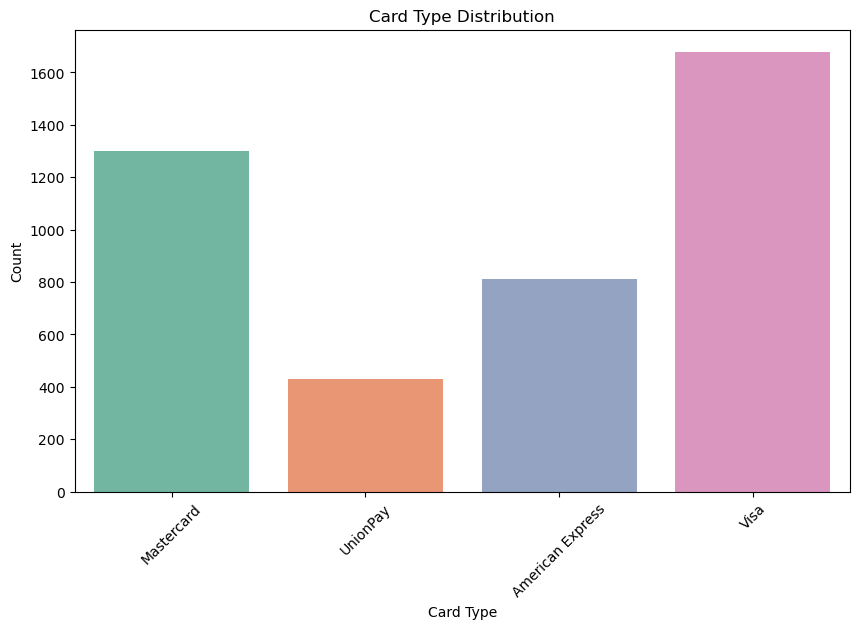

In [35]:
# 2. Countplot for Card Type
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Card_Type', palette='Set2')
plt.title('Card Type Distribution')
plt.xlabel('Card Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

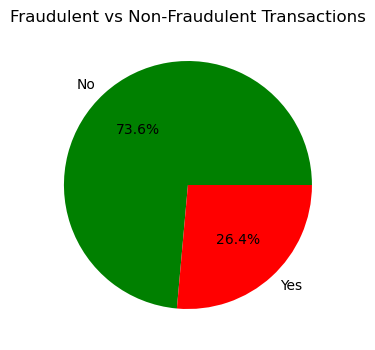

In [36]:
# 3. Pie chart for Is_Fraudulent
fraud_counts = df['Is_Fraudulent'].value_counts()
plt.figure(figsize=(4, 5))
plt.pie(fraud_counts, labels=fraud_counts.index, autopct='%1.1f%%', colors=['green', 'red'])
plt.title('Fraudulent vs Non-Fraudulent Transactions')
plt.show()

## Bivariate analysis

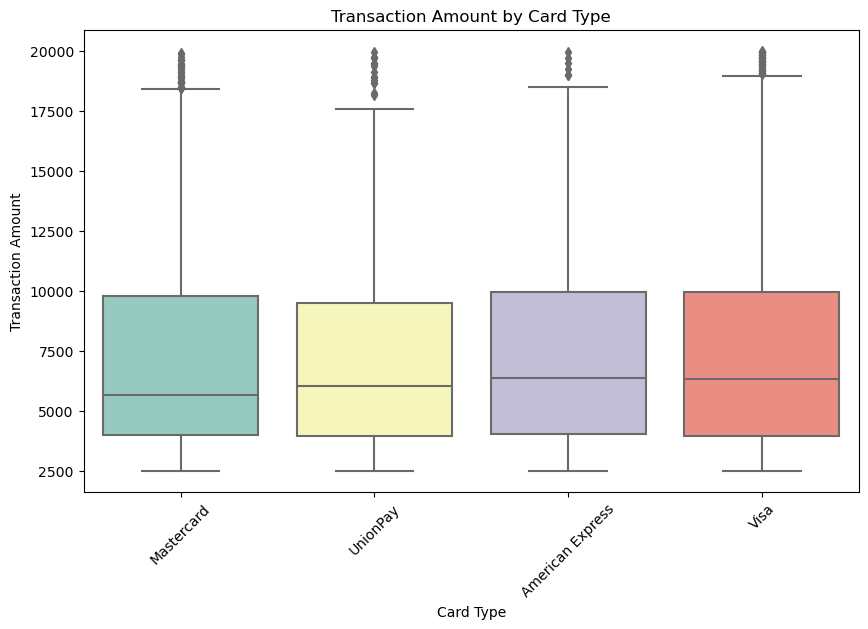

In [37]:
# 4. Boxplot of Transaction Amount by Card Type
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Card_Type', y='Transaction_Amount', palette='Set3')
plt.title('Transaction Amount by Card Type')
plt.xlabel('Card Type')
plt.ylabel('Transaction Amount')
plt.xticks(rotation=45)
plt.show()

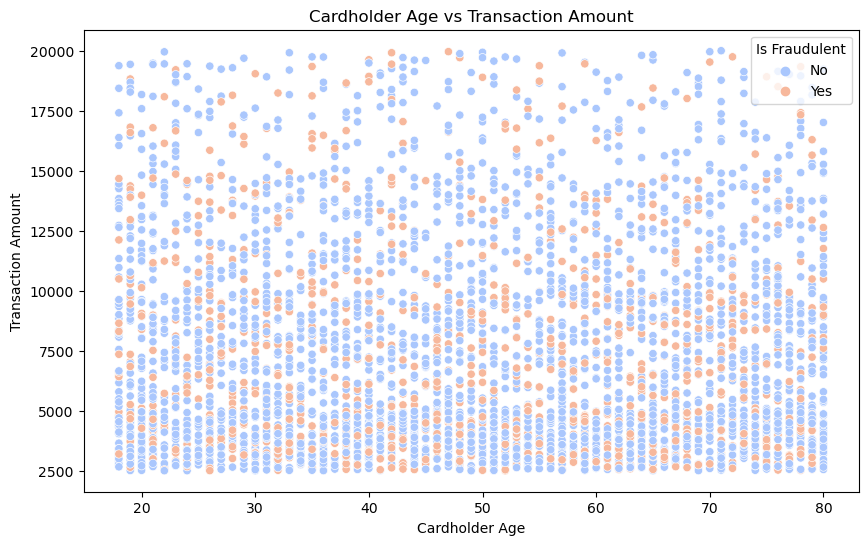

In [38]:
# 5. Scatterplot of Cardholder Age vs Transaction Amount
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Cardholder_Age', y='Transaction_Amount', hue='Is_Fraudulent', palette='coolwarm')
plt.title('Cardholder Age vs Transaction Amount')
plt.xlabel('Cardholder Age')
plt.ylabel('Transaction Amount')
plt.legend(title='Is Fraudulent')
plt.show()

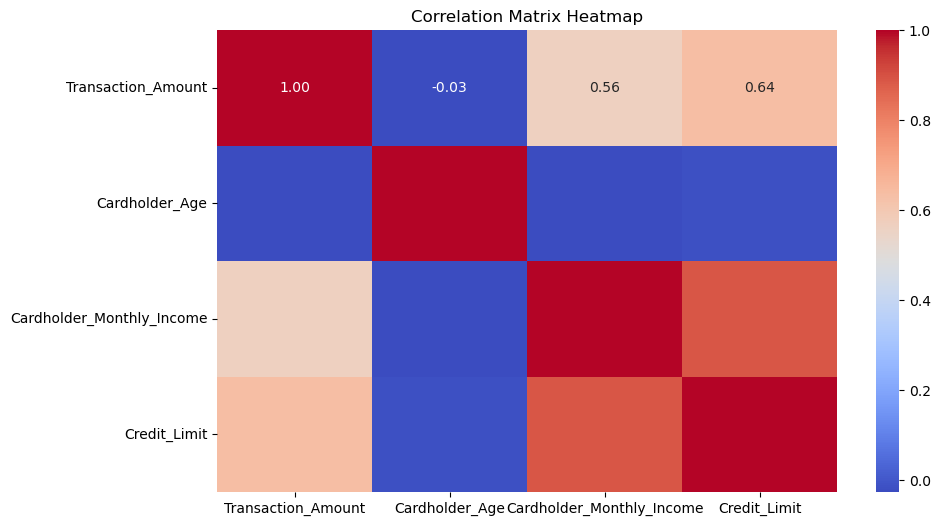

In [39]:
# 6. Heatmap for Correlation Matrix
plt.figure(figsize=(10, 6))
correlation_matrix = df[['Transaction_Amount', 'Cardholder_Age', 'Cardholder_Monthly_Income', 'Credit_Limit']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

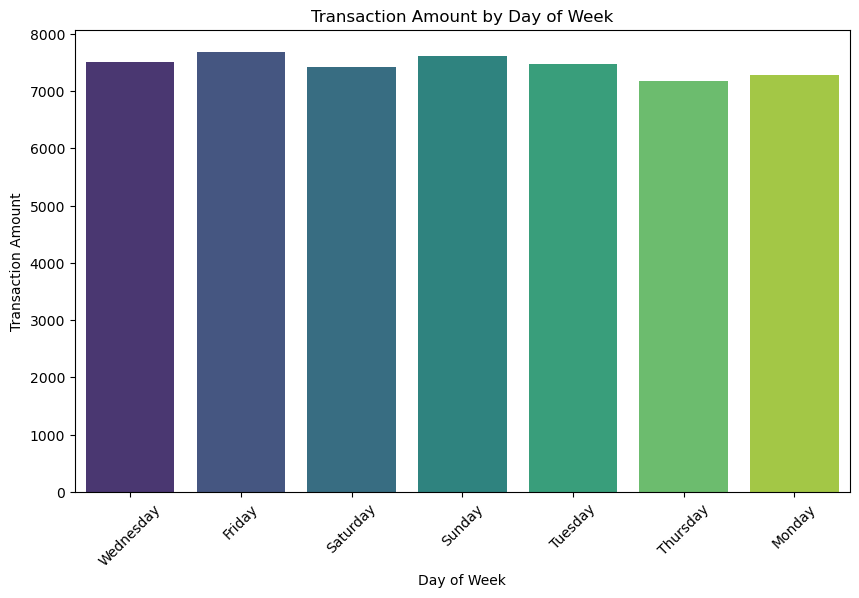

In [40]:
# 7. Barplot of Day of Week vs Transaction Amount
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Day_of_Week', y='Transaction_Amount', ci=None, palette='viridis')
plt.title('Transaction Amount by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Transaction Amount')
plt.xticks(rotation=45)
plt.show()

### Going for model building 

In [41]:
df.head()

,Card_Type,Merchant_Category,Transaction_Amount,City,Country,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent,Day,Month,Year,Time
0,Mastercard,Utility bill,2721.4,Tokyo,Japan,23.0,Female,9463.0,3636.965,10000.0,Unknown,Wednesday,No,1,1,2020,09:43:00
1,UnionPay,Retail,8395.6,Tokyo,Japan,49.0,Male,14812.0,8917.912,15000.0,Desktop,Friday,No,3,1,2020,16:26:00
3,American Express,Online Shopping,16738.1,Tokyo,Japan,52.0,Female,14807.0,17315.552,20000.0,Desktop,Saturday,Yes,4,1,2020,14:56:00
4,American Express,Retail,8117.0,Chicago,USA,37.0,Female,17447.0,5271.309,20000.0,Mobile,Saturday,No,4,1,2020,17:26:00
5,American Express,Entertainment,13191.8,Tokyo,Japan,80.0,Male,16667.0,8039.344,15000.0,Point-of-Sale Terminal,Saturday,No,4,1,2020,19:55:00


---
## **One hot Encoding**
**One-Hot Encoding** is a technique used to convert categorical variables into a format that can be provided to machine learning algorithms to improve prediction accuracy.

### What is it?
One-hot encoding transforms categorical data into a numerical format where each category in a feature is converted into a separate binary column. Each column represents a category, and a "1" is placed in the column corresponding to the category for a particular row, while "0"s are placed in all other columns.

### Example:
Let's say we have a column `Day_of_Week` with the following values:

```
['Monday', 'Tuesday', 'Wednesday', 'Monday']
```

After applying one-hot encoding, it would look like this:

| Monday | Tuesday | Wednesday |
|--------|---------|-----------|
| 1      | 0       | 0         |
| 0      | 1       | 0         |
| 0      | 0       | 1         |
| 1      | 0       | 0         |

### How it Works:
- Each unique category in the original column gets its own binary (0/1) column.
- For each row, if that row's value corresponds to a specific category, the column for that category will be set to 1. All other columns will be set to 0.

### Why Use One-Hot Encoding?
- **Machine Learning Models**: Most machine learning algorithms require numerical input, and one-hot encoding allows categorical data to be transformed into a numerical format without introducing any ordinal relationship.
- **Avoid Ordinal Implications**: For categorical data, one-hot encoding avoids making any assumptions about the order of categories. For example, converting "Low", "Medium", and "High" into integers (0, 1, 2) would introduce an artificial sense of ordering, but one-hot encoding treats each category independently.

### Disadvantages:
- **Memory Usage**: One-hot encoding increases the number of columns (features) in the dataset, which can lead to high memory usage, especially for columns with many unique categories.
- **Sparsity**: It creates sparse matrices because most of the values will be 0. This can make some algorithms inefficient if not handled properly.

Overall, one-hot encoding is widely used for categorical variables in machine learning tasks to allow algorithms to better understand and process the data.

In [42]:
df_encoded = pd.get_dummies(df, columns=['Card_Type', 'Merchant_Category', 'City', 'Country', 
                                          'Cardholder_Gender', 'Device_Type'], drop_first=True)

# Display the encoded dataframe
df_encoded.head()

,Transaction_Amount,Cardholder_Age,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Day_of_Week,Is_Fraudulent,Day,Month,Year,...,Country_India,Country_Japan,Country_UAE,Country_UK,Country_USA,Cardholder_Gender_Male,Device_Type_Desktop,Device_Type_Mobile,Device_Type_Point-of-Sale Terminal,Device_Type_Unknown
0,2721.4,23.0,9463.0,3636.965,10000.0,Wednesday,No,1,1,2020,...,False,True,False,False,False,False,False,False,False,True
1,8395.6,49.0,14812.0,8917.912,15000.0,Friday,No,3,1,2020,...,False,True,False,False,False,True,True,False,False,False
3,16738.1,52.0,14807.0,17315.552,20000.0,Saturday,Yes,4,1,2020,...,False,True,False,False,False,False,True,False,False,False
4,8117.0,37.0,17447.0,5271.309,20000.0,Saturday,No,4,1,2020,...,False,False,False,False,True,False,False,True,False,False
5,13191.8,80.0,16667.0,8039.344,15000.0,Saturday,No,4,1,2020,...,False,True,False,False,False,True,False,False,True,False


In [43]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4220 entries, 0 to 4998
Data columns (total 47 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Transaction_Amount                  4220 non-null   float64
 1   Cardholder_Age                      4220 non-null   float64
 2   Cardholder_Monthly_Income           4220 non-null   float64
 3   Cardholder_Average_Spend            4220 non-null   float64
 4   Credit_Limit                        4220 non-null   float64
 5   Day_of_Week                         4220 non-null   object 
 6   Is_Fraudulent                       4220 non-null   object 
 7   Day                                 4220 non-null   int32  
 8   Month                               4220 non-null   int32  
 9   Year                                4220 non-null   int32  
 10  Time                                4220 non-null   object 
 11  Card_Type_Mastercard                4220 non-nul

In [44]:
df_encoded = df_encoded.drop(['Time', 'Day_of_Week'], axis = 1)


In [45]:
df_encoded.head()

,Transaction_Amount,Cardholder_Age,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Is_Fraudulent,Day,Month,Year,Card_Type_Mastercard,...,Country_India,Country_Japan,Country_UAE,Country_UK,Country_USA,Cardholder_Gender_Male,Device_Type_Desktop,Device_Type_Mobile,Device_Type_Point-of-Sale Terminal,Device_Type_Unknown
0,2721.4,23.0,9463.0,3636.965,10000.0,No,1,1,2020,True,...,False,True,False,False,False,False,False,False,False,True
1,8395.6,49.0,14812.0,8917.912,15000.0,No,3,1,2020,False,...,False,True,False,False,False,True,True,False,False,False
3,16738.1,52.0,14807.0,17315.552,20000.0,Yes,4,1,2020,False,...,False,True,False,False,False,False,True,False,False,False
4,8117.0,37.0,17447.0,5271.309,20000.0,No,4,1,2020,False,...,False,False,False,False,True,False,False,True,False,False
5,13191.8,80.0,16667.0,8039.344,15000.0,No,4,1,2020,False,...,False,True,False,False,False,True,False,False,True,False


In [46]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4220 entries, 0 to 4998
Data columns (total 45 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Transaction_Amount                  4220 non-null   float64
 1   Cardholder_Age                      4220 non-null   float64
 2   Cardholder_Monthly_Income           4220 non-null   float64
 3   Cardholder_Average_Spend            4220 non-null   float64
 4   Credit_Limit                        4220 non-null   float64
 5   Is_Fraudulent                       4220 non-null   object 
 6   Day                                 4220 non-null   int32  
 7   Month                               4220 non-null   int32  
 8   Year                                4220 non-null   int32  
 9   Card_Type_Mastercard                4220 non-null   bool   
 10  Card_Type_UnionPay                  4220 non-null   bool   
 11  Card_Type_Visa                      4220 non-nul

### Model Building

In [47]:
x = df_encoded.drop(['Is_Fraudulent'], axis = 1).values
y = df_encoded['Is_Fraudulent'].values

In [48]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)

### Feature scaling

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [50]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

### Fitting the model

In [53]:
log.fit(x_train, y_train)

LogisticRegression()

### Predicting

In [54]:
y_pred = log.predict(x_test)
y_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [55]:
y_test

array(['No', 'No', 'Yes', ..., 'No', 'Yes', 'No'], dtype=object)

In [56]:
print((log.score(x_train, y_train))*100)
print((log.score(x_test, y_test))*100)

73.35815842924848
74.0916271721959


### Decision tree classifier

In [57]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [59]:
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [60]:
dt_pred = dt.predict(x_test)
dt_pred

array(['Yes', 'No', 'No', ..., 'No', 'Yes', 'No'], dtype=object)

In [61]:
print((dt.score(x_train, y_train))*100)
print((dt.score(x_test, y_test))*100)

100.0
60.66350710900474


### Random Forest classifier

In [62]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [63]:
rf_pred = rf.predict(x_test)
rf_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [64]:
print((rf.score(x_train, y_train))*100)
print((rf.score(x_test, y_test))*100)

100.0
73.93364928909952


### K fold cross validiation

In [65]:
from sklearn.model_selection import cross_val_score

In [66]:
print("Training for LogisticRegression after CV:",(cross_val_score(log, x_train, y_train).mean())*100)
print("Testing for LinearRegression after CV:",(cross_val_score(log, x_test, y_test).mean())*100)

Training for LogisticRegression after CV: 73.35816914738021
Testing for LinearRegression after CV: 73.61769008122995


In [67]:
print("Training for DecisionTree after CV:",(cross_val_score(dt, x_train, y_train).mean())*100)
print("Testing for DecisionTree after CV:",(cross_val_score(dt, x_test, y_test).mean())*100)

Training for DecisionTree after CV: 61.035418279847434
Testing for DecisionTree after CV: 62.32267903270985


In [68]:
print("Training for RandomForest after CV:",(cross_val_score(rf, x_train, y_train).mean())*100)
print("Testing for RandomForest after CV:",(cross_val_score(rf, x_test, y_test).mean())*100)

Training for RandomForest after CV: 73.22280535719408
Testing for RandomForest after CV: 73.61800130714886
